In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [108]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [109]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [110]:
df.shape

(15, 2)

In [111]:
print(df.corr())

                    Chirps/Second  Ground Temperature
Chirps/Second            1.000000            0.832042
Ground Temperature       0.832042            1.000000


In [112]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [113]:
print(df.columns.tolist())

['Chirps/Second', 'Ground Temperature']


In [114]:
#x = df['Ground Temperature'].values
#y = df['Chirps/Second'].values


In [115]:
x = df['Ground Temperature'].values.reshape(-1,1)
y = df['Chirps/Second'].values.reshape(-1,1)

In [116]:
print(df['Ground Temperature'].values) 
print(df['Ground Temperature'].values.shape)

[88.6 71.6 93.3 84.3 80.6 75.2 69.7 71.6 69.4 83.3 79.6 82.6 80.6 83.5
 76.3]
(15,)


In [117]:
print(x.shape)

(15, 1)


In [118]:
print(x)

[[88.6]
 [71.6]
 [93.3]
 [84.3]
 [80.6]
 [75.2]
 [69.7]
 [71.6]
 [69.4]
 [83.3]
 [79.6]
 [82.6]
 [80.6]
 [83.5]
 [76.3]]


In [119]:
from sklearn.linear_model import LinearRegression

li_reg = LinearRegression()

li_reg = li_reg.fit(x,y)

intercept = li_reg.intercept_
coefficient = li_reg.coef_


In [122]:
print('intercept:', li_reg.intercept_)
print('coefficient:', li_reg.coef_)

intercept: [0.45931465]
coefficient: [[0.20299973]]


In [123]:
f"The regression eqauation is y = {coefficient}x + {intercept} "

'The regression eqauation is y = [[0.20299973]]x + [0.45931465] '

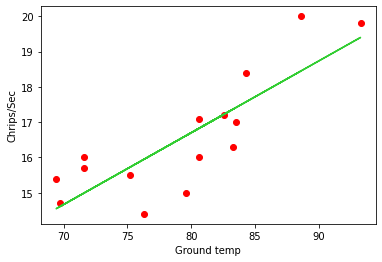

In [124]:
plt.scatter(x, y, c='red')
plt.plot(x, li_reg.predict(x), c='limegreen')
plt.xlabel('Ground temp')
plt.ylabel('Chrips/Sec')
plt.show()

In [125]:
print('r-squared: ', li_reg.score(x, y))

r-squared:  0.6922946529146998


In [126]:
y_pred = li_reg.predict([[95]])
print(y_pred)

[[19.74428913]]


In [127]:
x = (18 - intercept)/coefficient
print(x)

[[86.40743135]]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [128]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [129]:
print(df.corr())

          Brain      Body
Brain  1.000000  0.934164
Body   0.934164  1.000000


In [130]:
x = df['Brain'].values.reshape(-1,1)
y = df['Body'].values.reshape(-1,1)

In [131]:
from sklearn.linear_model import LinearRegression

li_reg = LinearRegression()

li_reg = li_reg.fit(x,y)

intercept = li_reg.intercept_
coefficient = li_reg.coef_

In [132]:
print('intercept:', li_reg.intercept_)
print('coefficient:', li_reg.coef_)

intercept: [91.00439621]
coefficient: [[0.96649637]]


In [133]:
f"The regression eqauation is y = {coefficient}x + {intercept} "

'The regression eqauation is y = [[0.96649637]]x + [91.00439621] '

In [134]:
print('r-squared: ', li_reg.score(x, y))

r-squared:  0.8726620843043331


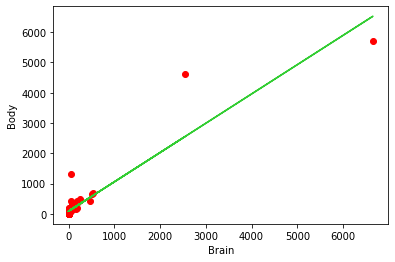

In [135]:
plt.scatter(x, y, c='red')
plt.plot(x, li_reg.predict(x), c='limegreen')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [137]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [138]:
df.shape

(52, 6)

In [139]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [141]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [145]:
x = df[['Sex','Rank','Year','Degree','YSdeg']]
y = df[['Salary']]

In [146]:
x.shape

(52, 5)

In [149]:
from sklearn.linear_model import LinearRegression

li_reg = LinearRegression()

li_reg = li_reg.fit(x,y)

intercept = li_reg.intercept_
coefficients = li_reg.coef_


In [150]:
print('intercept:', li_reg.intercept_)
print('coefficients:', li_reg.coef_)

intercept: [11410.14654726]
coefficients: [[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]]


In [151]:
print('r-squared: ', li_reg.score(x, y))

r-squared:  0.8547180674410969


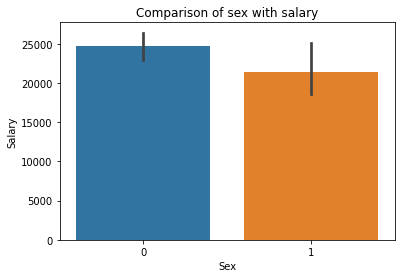

In [161]:
import seaborn as sb
data = df
plt.figure()
sb.barplot(x = 'Sex',y = 'Salary', data = df).set(title = f'Comparison of sex with salary')
plt.show()

As we can see from the above bar chart between sex and salary we can observe that male are receving slightly higher salary in comparasion with females